# Facial Emotion Detection EDA

In [2]:
# Loading the necessary libraries

import shutil,os
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import shutil
from PIL import Image
import matplotlib.pyplot as plt

# Directories of latest dataset
data_train = '/Users/santoshyadaw/team1/data/MMAFEDB/train'
data_valid = '/Users/santoshyadaw/team1/data/MMAFEDB/valid'
data_test = '/Users/santoshyadaw/team1/data/MMAFEDB/test'

In [3]:
def load_images(PATH):
    """
    This function takes in the directory path of the images and returns a dictionary containing information about the images.
    
    Parameters: PATH -> directory path in string format
    Output: Dictionary
    """
    
    # Initialise the dictionary which we will be storing each images information
    image_to_px = {}
    imgs = {'Filename': list(),
            'Class': list(),
            'Format' : list(),
            'Height in Px' : list(),
            'Width in Px' : list(),
            'Resolution' : list(),
            'Number of Channels': list(),
            'Colour Bands': list()
           }
    
    # Go through the root, directory and files
    for roots, dirs, files in os.walk(PATH):
        
        # Split the roots
        path = roots.split(os.sep)
        
        # Determine the name of the folder 
        class_name = os.path.basename(roots)
        
        # For each file inside the folder
        for file in files:
            
            # Ignore .DS_Store
            if file[0] == '.':
                
                continue
            
            # Read image
            img = Image.open(roots + "/" + file)
            
            # Write the image filename into dictionary
            imgs['Filename'].append(file)
            
            # Write the Class of the image which is the folder name
            imgs['Class'].append(class_name)
            
            # Write the format into dictionary
            imgs['Format'].append(img.format)
            
            # Write the height of the image into dictionary
            imgs['Height in Px'].append(img.size[0])
            
            # Write the width of the image into dictionary
            imgs['Width in Px'].append(img.size[1])
            
            # Write the resolution of the image into dictionary
            imgs['Resolution'].append(img.size[0]*img.size[1])
            
            # Write the number of channels
            imgs['Number of Channels'].append(int(len(img.getbands())))
            
            # Write the colour band
            imgs['Colour Bands'].append(img.getbands())
            
            image_to_px[file] = np.array(img)
    
    return imgs, image_to_px

In [2]:
print('a')

In [ ]:
# Getting datagrame and image to px
data, image_to_px = load_images(data_train)

In [8]:
# Read dictionary into pandas dataframe
df = pd.DataFrame.from_dict(data)
df

,Filename,Class,Format,Height in Px,Width in Px,Resolution,Number of Channels,Colour Bands
0,86825Exp3astound_teacher_979.jpg,happy,JPEG,48,48,2304,3,"(R, G, B)"
1,Happy.19696.jpg,happy,JPEG,48,48,2304,1,"(L,)"
2,Happy.8956.jpg,happy,JPEG,48,48,2304,1,"(L,)"
3,68317Exp3awe_grandmother_419.jpg,happy,JPEG,48,48,2304,3,"(R, G, B)"
4,66277Exp3awe_boss_643.jpg,happy,JPEG,48,48,2304,3,"(R, G, B)"
...,...,...,...,...,...,...,...,...
92963,50081Exp1awe_son_942.jpg,disgust,JPEG,48,48,2304,3,"(R, G, B)"
92964,86513Exp1astound_son_70.jpg,disgust,JPEG,48,48,2304,3,"(R, G, B)"
92965,30933Exp1boring_boss_115.jpg,disgust,JPEG,48,48,2304,3,"(R, G, B)"
92966,57573Exp1amazed_mother_414.jpg,disgust,JPEG,48,48,2304,3,"(R, G, B)"


In [9]:
 # Summary statistics of the dataset
df.describe()

,Height in Px,Width in Px,Resolution,Number of Channels
count,92968.0,92968.0,92968.0,92968.000000
mean,48.0,48.0,2304.0,2.382390
std,0.0,0.0,0.0,0.924006
min,48.0,48.0,2304.0,1.000000
25%,48.0,48.0,2304.0,1.000000
50%,48.0,48.0,2304.0,3.000000
75%,48.0,48.0,2304.0,3.000000
max,48.0,48.0,2304.0,3.000000


In [10]:
# List the format of the images in data
data_form = df['Format'].unique()
print(f"There are {df['Format'].nunique()} file formats {data_form}")

# List the Class of the images in data
data_class = df['Class'].unique()

# List of the num Class of the images in data
data_class_num = df['Class'].nunique()
print(f"There are {data_class_num} Classes {data_class}")

# List of the unique num of channels 
data_channels = df['Number of Channels'].unique()

# List of the unique num of channels 
data_channels_num = df['Number of Channels'].nunique()
print(f"There are {data_channels_num} Colour Channels {data_channels}")

# List the number of colour bands and type
data_colour_bands = df['Colour Bands'].unique()
data_colour_bands_num = df['Colour Bands'].nunique()
print(f"There are {data_colour_bands_num} types of colour bands {data_colour_bands}")

There are 1 file formats ['JPEG']
There are 7 Classes ['happy' 'sad' 'fear' 'surprise' 'neutral' 'angry' 'disgust']
There are 2 Colour Channels [3 1]
There are 2 types of colour bands [('R', 'G', 'B') ('L',)]


/Users/santoshyadaw/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


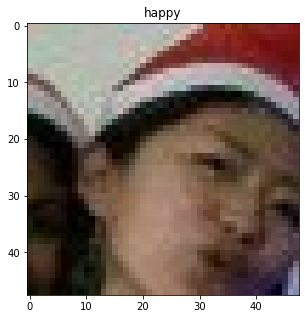

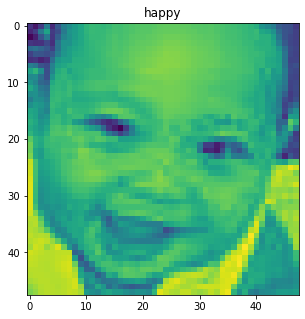

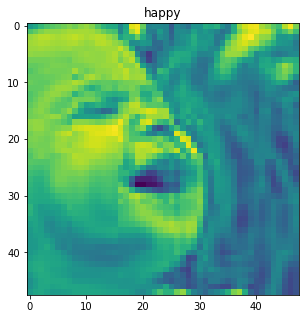

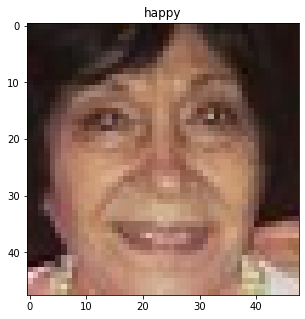

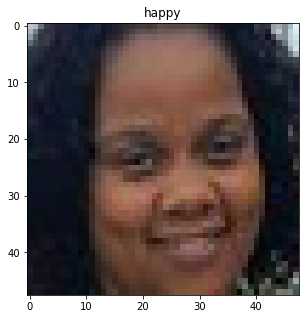

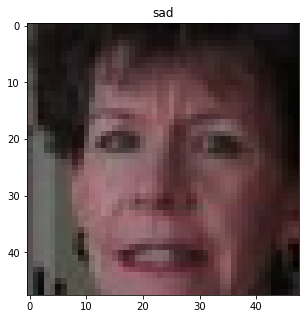

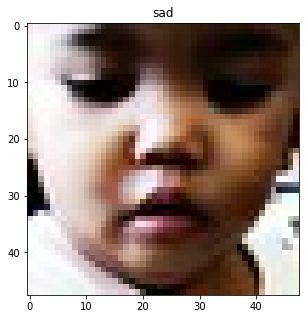

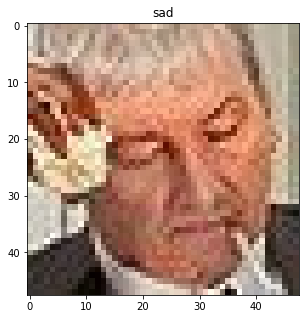

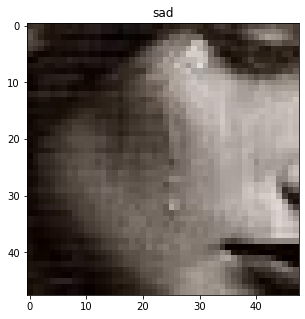

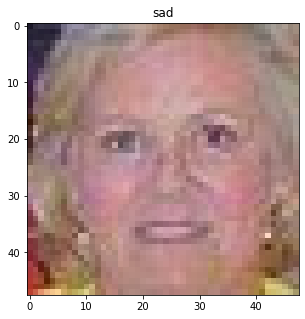

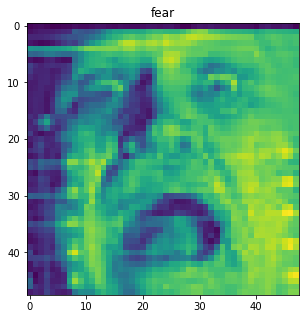

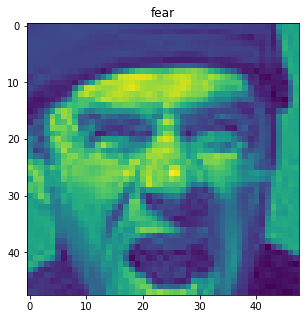

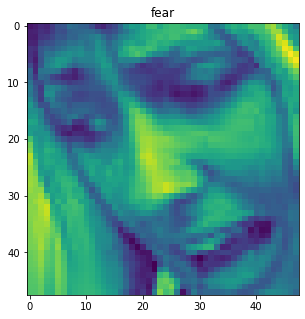

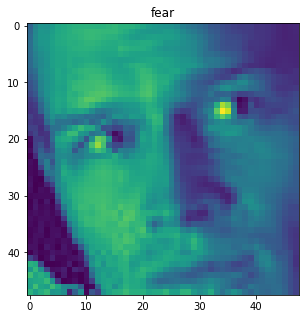

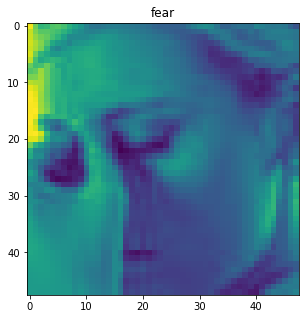

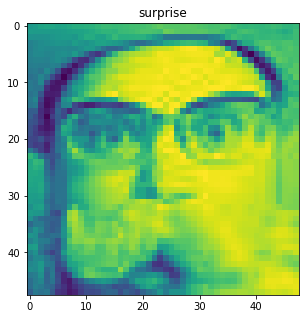

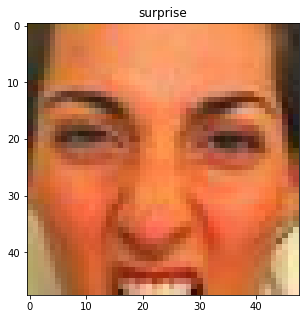

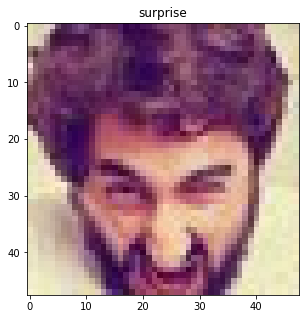

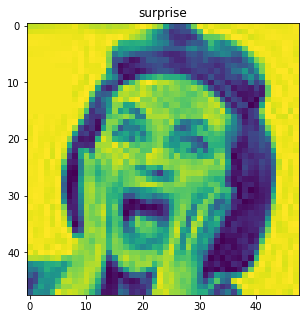

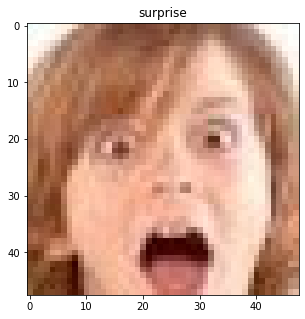

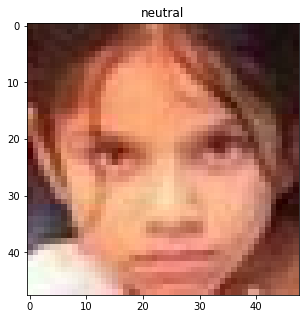

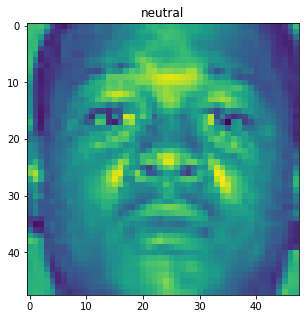

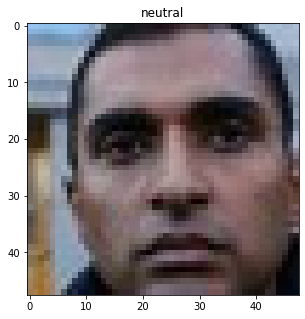

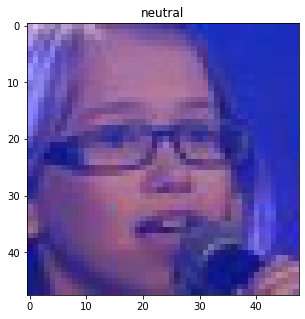

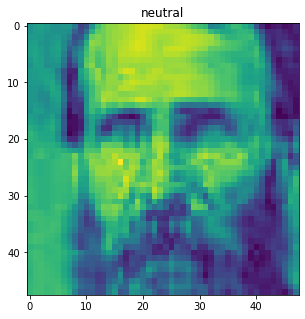

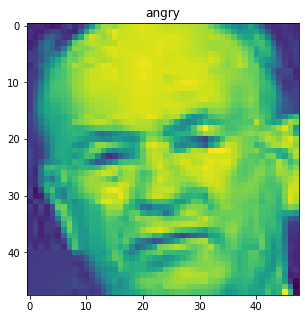

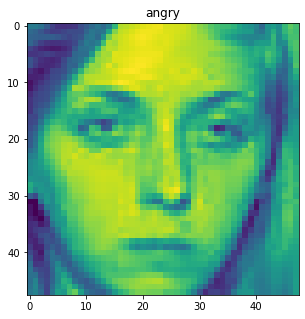

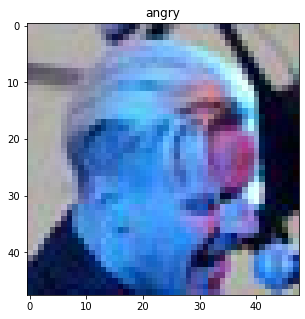

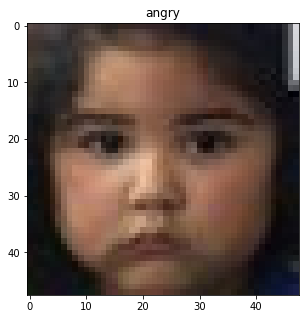

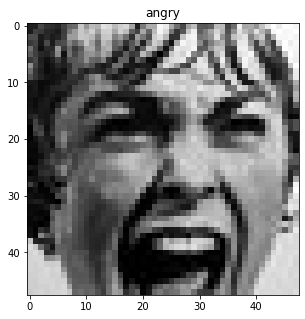

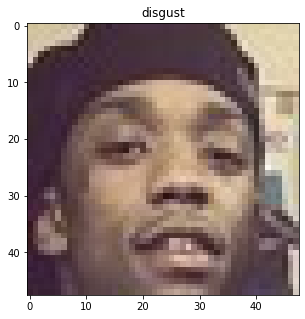

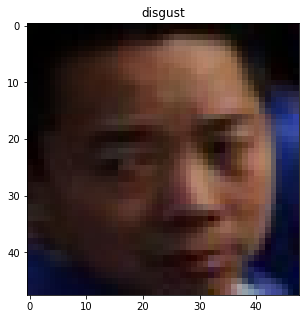

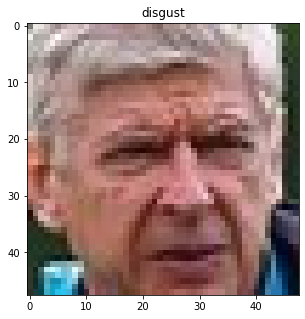

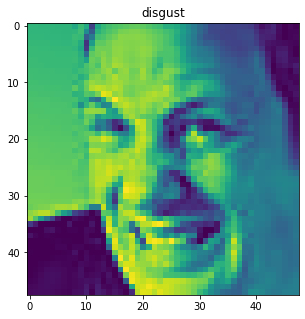

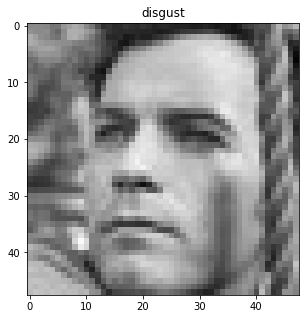

In [45]:
# Plotting the images from different class
emotions = df['Class'].unique().tolist()
for emo in emotions:
    emo_bool = df['Class'] == emo
    image_mpo = list(df.loc[emo_bool,'Filename'][:5])
    for i,file_path in enumerate(image_mpo):
        plt.figure(figsize=(5,5))
        plt.imshow(image_to_px[file_path])
        image_class = df.loc[df['Filename']==file_path,'Class']
        plt.title(image_class.values[0])

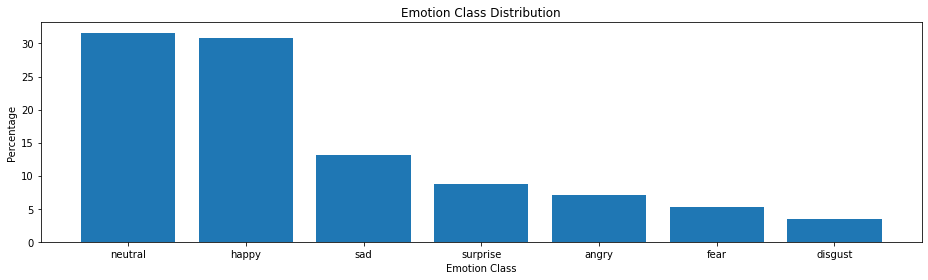

In [19]:
# Distribution Plot for Class

plt.figure(figsize=(13,4))
plt.xlabel("Emotion Class")
plt.ylabel("Percentage")
plt.title("Emotion Class Distribution")
df_class_count = df['Class'].value_counts().reset_index().rename(columns={"index":"Emotion Class", "Class": "Count"})
df_class_count['Percentage'] = (df_class_count['Count'] / df_class_count['Count'].sum())*100
plt.bar(df_class_count['Emotion Class'], height = df_class_count["Percentage"])
plt.tight_layout()

In [22]:
# Classes counts
df['Class'].value_counts()

neutral     29384
happy       28592
sad         12223
surprise     8113
angry        6566
fear         4859
disgust      3231
Name: Class, dtype: int64

### Summary EDA
- There is only one file format (jpg).
- The dataset contains 7 classes (angry, disgust, fear, happy, neutral, sad and surprise).
- All the images have a resolution of 2304 pixels.
- Images consists of 2 channels (i.e. black and white and colour).
- The dataset is imbalanced with the neutral and happy class having the highest amount occupying around 30% of the dataset. The disgust and fear class has the least amount of images (around 5%) of the dataset.